Data Set-up
---
In this lab we’re going to be looking at avocado prices.

The data set comes to us from Kaggle and represents weekly retail scan data. A description of the data can be found here:

https://www.kaggle.com/datasets/timmate/avocado-prices-2020

0. Import the data and declare your package dependencies.

In [23]:
# Package Dependencies
import pandas as pd
import numpy as np

In [24]:
# Importing the Data
avocados = pd.read_csv('Data/avocado-updated-2020.csv')
avocados

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico



1. Briefly describe the data set. What information does it contain?

     Overall, this dataset captures information related to avocado sales, including pricing, sales volume, product type, and regional differences.
   - Avocado Size, measures sales volume for avocados in three sizes: small, large, and extra large respectively is measured in Deonted by PLU code: 4046, 4225, 4770
   - The date is the time period for the sales data
   - The total number of bags sold is brokend down by sales volue by size with the total number of small, medium, and large avocados sold
   - Average Price is the average selling price of avocados for the specific time period and region
   - Total Volume: Total number of avocados sold
   - small_bags, large_bags, xlarge_bags are the breakdown of avocado sales by bag size
   - geography is the region where sales occured
   - There are two types of avocados: Conventional and Organic

2. Clean the data in any way you see fit.


In [25]:
# Define the regions and states for filtering
region_list = ["Midsouth", "Northeast", "Northern New England", "Southeast", "West", "Plains", "Great Lakes", "South Central", "Total U.S."]
state_list = region_list + ["California", "South Carolina", "West Tex/New Mexico"]

# Step 1: Filter regions
avocado_region = avocados[avocados['geography'].isin(region_list)]

# Step 2: Filter states and regions
avocado_state = avocados[avocados['geography'].isin(state_list)]

# Step 3: Clean the region data
avocado_clean_region = avocado_region.rename(columns={"4046": "small_hass",
                                                      "4225": "large_hass",
                                                      "4770": "xlarge_hass"})
avocado_clean_region['type'] = avocado_clean_region['type'].astype('category')
avocado_clean_region['geography'] = avocado_clean_region['geography'].astype('category')
avocado_clean_region = avocado_clean_region[avocado_clean_region['geography'] != "Total U.S."]


# Step 4: Clean the city data
avocado_clean_city = avocados[~avocados['geography'].isin(state_list)]
avocado_clean_city = avocado_clean_city.rename(columns={"4046": "small_hass",
                                                        "4225": "large_hass",
                                                        "4770": "xlarge_hass",
                                                        "geography": "city"})
avocado_clean_city['type'] = avocado_clean_city['type'].astype('category')
avocado_clean_city['city'] = avocado_clean_city['city'].astype('category')

# Combine avocado_clean_city and avocado_clean_region into a single DataFrame
avocado_clean = pd.concat([avocado_clean_city, avocado_clean_region])




In [26]:
avocado_clean_region.head()

,date,average_price,total_volume,small_hass,large_hass,xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
30,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,2015,Great Lakes
31,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,2015,Great Lakes
50,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,2015,Midsouth
51,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,0.00,organic,2015,Midsouth
58,2015-01-04,1.09,3759282.62,126640.65,2860709.93,7580.38,764351.66,669970.50,94381.16,0.00,conventional,2015,Northeast


In [27]:
avocado_clean_city.head()

,date,average_price,total_volume,small_hass,large_hass,xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,city
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [28]:
avocado_clean.head()


,date,average_price,total_volume,small_hass,large_hass,xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,NaN


3. Which major geographical region sold the most
total organic, small Hass avocados in 2017?

In [29]:
# Filter for 2017 and organic avocados
organic_2017_region = avocado_clean_region[(avocado_clean_region['year'] == 2017) &
                                           (avocado_clean_region['type'] == 'organic')]

# Group by geography and sum the small Hass avocados sold
organic_2017_region_sales = organic_2017_region.groupby('geography')['small_hass'].sum().reset_index()

# Find the region with the highest sales
top_region = organic_2017_region_sales.sort_values(by='small_hass', ascending=False).iloc[0]

top_region

<positron-console-cell-29>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


geography           West
small_hass    1870206.29
Name: 8, dtype: object

In 2017, the West major geographical region sold the most total organic small Hass avocados, with a total of 1,870,206.29 units sold

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [30]:
# Splitting the date variable into month, day, and year
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day

# Grouping by month and calculating the average volume of avocado sales
avg_volume_by_month = avocado_clean.groupby('month')['total_volume'].mean().reset_index()

# Finding the month with the highest average volume
top_sales_month = avg_volume_by_month.sort_values(by='total_volume', ascending=False).iloc[0]

top_sales_month

month                5.000000
total_volume    666099.355474
Name: 4, dtype: float64

The month with the highest average volume of avocado sales is May, with an average total volume of approximately 666,099.36.

5. Which metro area geographical regions sold
the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

<positron-console-cell-31>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


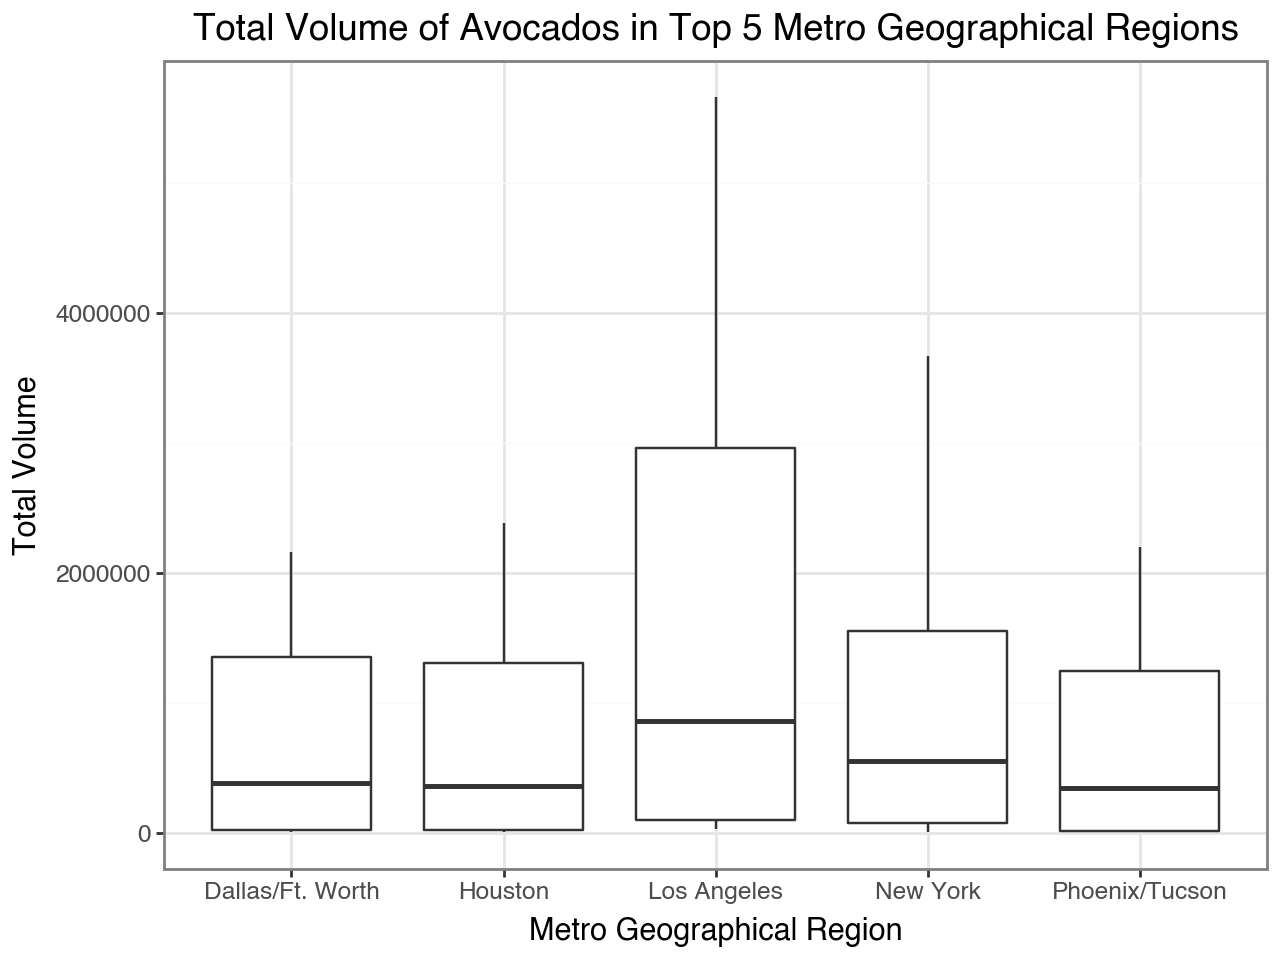

In [31]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme_bw, theme_minimal

# Calculate the average total volume of avocado sales per city
city_sales_avg = avocado_clean_city.groupby('city')['total_volume'].mean().reset_index()

# Top 5 metro geographical regions with the highest average total volume
top_5_cities = city_sales_avg.sort_values(by='total_volume', ascending=False).head(5)

# Filter avocado_clean_city dataframe for top 5 cities
top_5_cities_data = avocado_clean_city[avocado_clean_city['city'].isin(top_5_cities['city'])]

(ggplot(top_5_cities_data, aes(x='city', y='total_volume'))
        + geom_boxplot()
        + labs(title='Total Volume of Avocados in Top 5 Metro Geographical Regions', x='Metro Geographical Region', y='Total Volume')
        + theme_bw()
)


This boxplot compares the total volume of avocados sold across the top five metro geographical regions: Dallas/Ft. Worth, Houston, Los Angeles, New York, and Phoenix/Tucson. Each region displays the distribution of total avocado volumes, with Los Angeles showing the highest variability and median volume. Los Angeles has a noticeably larger volume range, with a higher upper quartile and a significant number of outliers above the 75th percentile. The other regions—Dallas, Houston, New York, and Phoenix—exhibit more consistent distributions with lower overall volumes compared to Los Angeles. Overall, the plot highlights Los Angeles as a dominant market for avocado sales by volume.

### Pivoting

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [41]:
# Defining the California regions of interest
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Filtering the cleaned data set for these California regions
california_data = avocado_clean_city[avocado_clean_city['city'].isin(california_regions)]

# Displaying the first few rows of the California-specific data
california_data.head()

,date,average_price,total_volume,small_hass,large_hass,xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,city
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego


7. In which California regions is the price of
organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [33]:
# Group by city and type (organic vs. conventional), then calculate average prices
price_diff = california_data.groupby(['city', 'type'])['average_price'].mean().unstack()

# Calculate the difference between organic and conventional prices
price_diff['price_difference'] = price_diff['organic'] - price_diff['conventional']

# Remove rows with NaN values in the price_difference column
price_diff_clean = price_diff.dropna()

# Display the cleaned results
price_diff_clean

<positron-console-cell-33>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


type,conventional,organic,price_difference
city,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


San Francisco shows the greatest price disparity, with a difference of 0.719 between organic and conventional avocados.

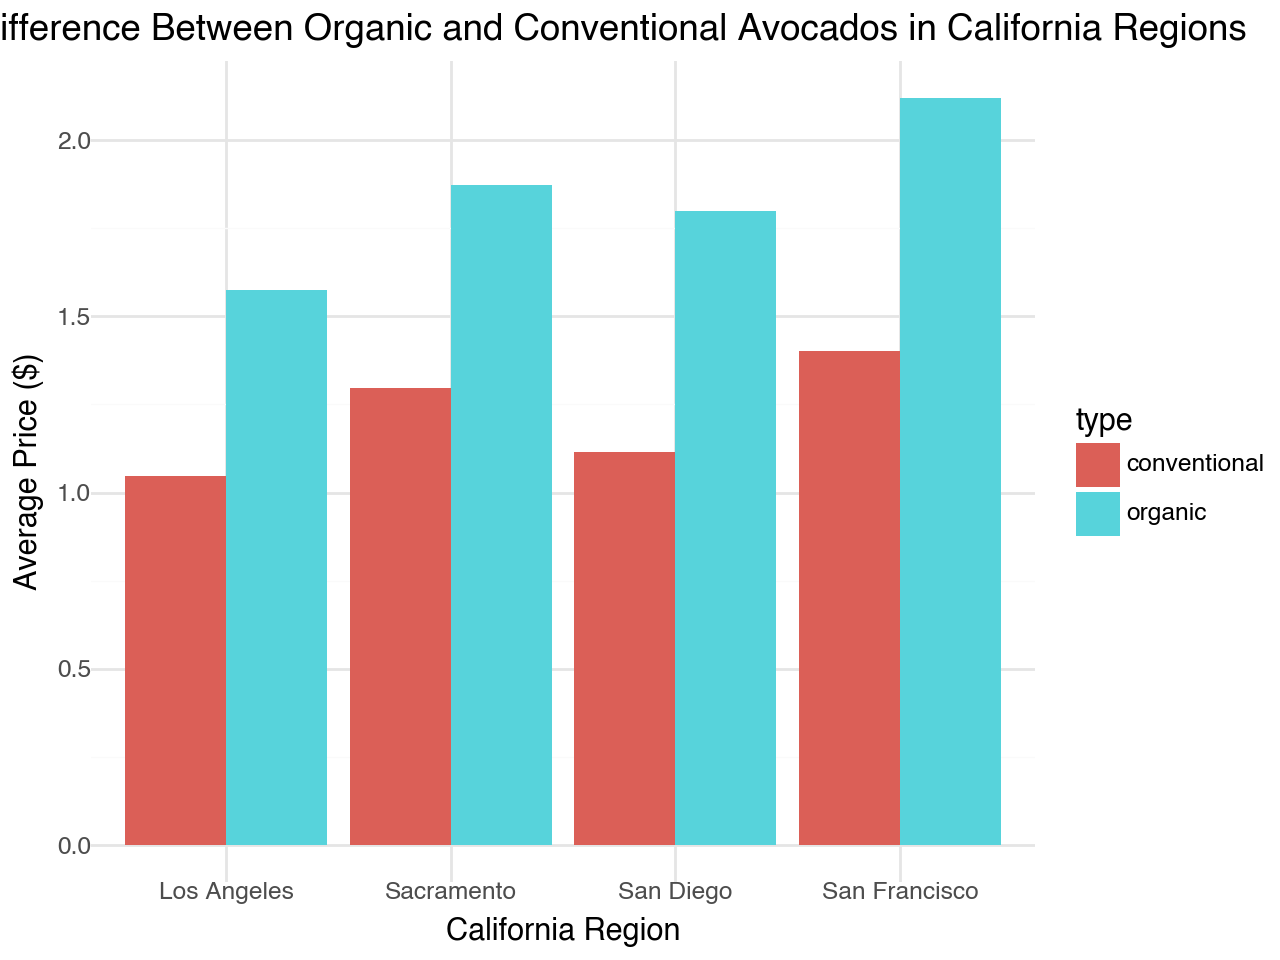

In [34]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, position_dodge

# Resetting the index to get the city and type columns
price_diff_clean = price_diff_clean.reset_index()

# Melt the dataframe to reshape it for plotting
price_diff_melted = price_diff_clean.melt(id_vars=['city'], value_vars=['conventional', 'organic'],
                                          var_name='type', value_name='price')

# Creating the bar plot using plotnine
(ggplot(price_diff_melted, aes(x='city', y='price', fill='type'))
                   + geom_bar(stat='identity', position=position_dodge())
                   + labs(title="Price Difference Between Organic and Conventional Avocados in California Regions",
                          x="California Region", y="Average Price ($)")
                   + theme_minimal())



Sources:

https://www.e-education.psu.edu/eme210/node/878

https://ggplot2.tidyverse.org/reference/position_dodge.html

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

<img src = "q8.png"
    width = "640"
    height = "480">

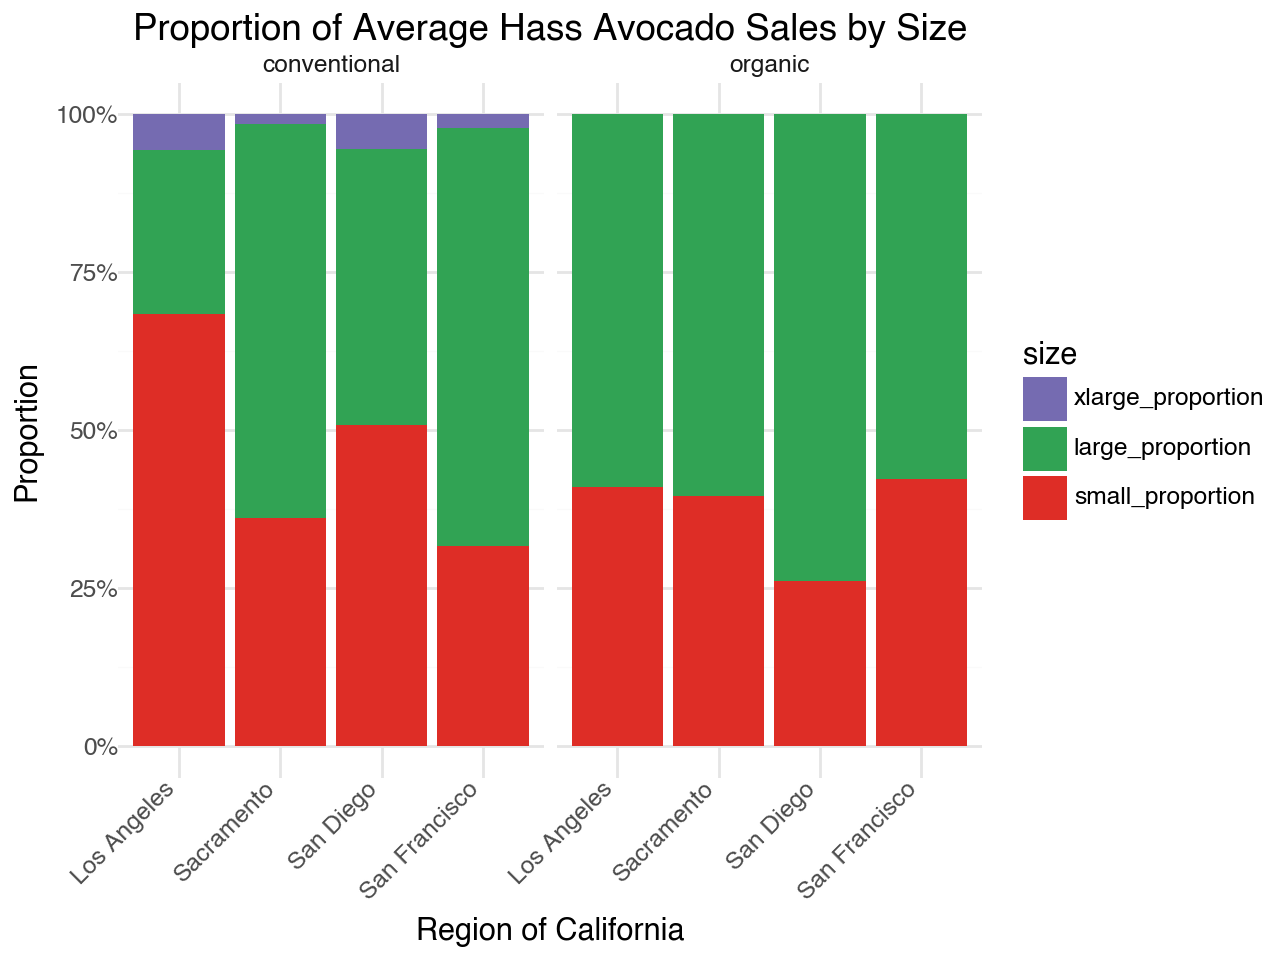

In [35]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_data = avocados[avocados['geography'].isin(california_regions)]  # Adjust 'geography' if needed

california_sales_by_size = california_data.groupby(['geography', 'type']).agg({
    '4046': 'sum',  
    '4225': 'sum',  
    '4770': 'sum'   
}).reset_index()

# Calculate total sales and the proportions of each size
california_sales_by_size['total_sales'] = california_sales_by_size['4046'] + california_sales_by_size['4225'] + california_sales_by_size['4770']
california_sales_by_size['small_proportion'] = california_sales_by_size['4046'] / california_sales_by_size['total_sales']
california_sales_by_size['large_proportion'] = california_sales_by_size['4225'] / california_sales_by_size['total_sales']
california_sales_by_size['xlarge_proportion'] = california_sales_by_size['4770'] / california_sales_by_size['total_sales']

# Melt the DataFrame for plotting
california_sales_melted = california_sales_by_size.melt(id_vars=['geography', 'type'],
                                                        value_vars=['small_proportion', 'large_proportion', 'xlarge_proportion'],
                                                        var_name='size', value_name='proportion')


import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, position_fill, theme, element_text, scale_y_continuous, scale_fill_manual


california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_sales_filtered = california_sales_melted[california_sales_melted['geography'].isin(california_regions)]

california_sales_filtered['size'] = pd.Categorical(california_sales_filtered['size'],
                                                   categories=['xlarge_proportion', 'large_proportion', 'small_proportion'],
                                                   ordered=True)

custom_colors = ["#756bb1", "#31a354", "#de2d26"]  

(ggplot(california_sales_filtered, aes(x='geography', y='proportion', fill='size'))
                                          + geom_bar(stat='identity', position=position_fill())
                                          + facet_wrap('~type')
                                          + scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])  # Convert proportions to percentages
                                          + scale_fill_manual(values=custom_colors)  # Apply custom colors
                                          + labs(title="Proportion of Average Hass Avocado Sales by Size",
                                                 x="Region of California", y="Proportion")
                                          + theme_minimal()
                                          + theme(axis_text_x=element_text(rotation=45, hjust=1)))  # Rotate x-axis labels


Sources: 

https://plotnine.org/reference/theme.html

https://stackoverflow.com/questions/60132208/python-plotnine-how-to-change-color-scale

### Using Outside Data

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

Dataset Source:

https://www.zillow.com/research/data/

In [36]:
# Importing the Data
house_prices = pd.read_csv('Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
house_prices

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31
0,102001,0,United States,country,NaN,122710.838539,122926.726242,123194.458782,123768.692526,124429.566719,125138.112926,125888.602142,126698.682214,127541.309306,128387.145733,129228.931690,130071.854653,130845.609653,131530.855138,132191.785259,132906.397675,133677.573662,134468.783656,135282.909775,136133.428051,136991.533568,...,349204.436908,349580.097531,348297.494049,347064.139227,346051.491481,345131.769268,343926.450641,343045.569634,342983.309098,343959.704777,345605.771123,347567.566335,349337.251431,350979.443458,352220.127020,353148.536981,353806.242676,354242.717001,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,226134.550908,228513.404843,231047.014277,233639.883600,236226.037660,238733.346390,241101.109870,243357.293791,245670.805671,247916.009691,250186.256508,252417.460426,254820.376777,257269.238254,259899.127084,262612.512096,...,621491.822349,622220.085149,619691.787799,617105.015253,615063.248445,613621.469079,612794.295598,611424.314824,611742.749716,613770.046841,617839.269724,622049.358682,625686.404977,629017.641888,631770.788691,634140.581831,636475.270504,639265.650987,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,230997.284013,233435.865741,235897.679856,238216.688204,240287.445269,242159.639621,244033.033892,245397.652741,246882.665341,248569.952866,251050.727798,253641.106612,256116.880754,258603.673386,261090.329698,263577.046791,...,903285.568831,900195.049581,894503.947171,889212.589301,885449.707337,882309.409574,873974.532094,863021.413774,853210.610272,850822.721384,854622.871304,862454.912867,873713.866192,887336.228423,901090.661387,912534.465332,921146.559682,926554.539271,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,156769.312047,157739.541490,159108.570094,160716.132539,162567.985094,163972.799785,165120.548121,165949.257175,166761.718877,167616.098723,168522.792698,169613.721623,170750.498465,171866.195215,173243.919161,174788.112558,...,300589.438583,299968.037354,298276.547709,296916.241838,296138.385213,295714.854912,295101.412347,294946.653005,295596.973731,297303.522441,299513.910926,302097.308411,304660.920971,307136.181372,308981.069143,310354.632728,311275.135372,311913.816691,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,126844.627565,127079.273297,127430.770664,127871.269902,128372.421859,128844.560270,129298.378601,129529.602766,129339.965679,129061.293496,128904.380614,129017.073879,129116.322410,129215.714710,129466.081051,129712.052959,...,382904.007297,383562.542404,381873.933306,379826.009163,377925.921551,375948.609598,373400.796386,371129.537330,369588.819947,369035.837307,369322.506026,370142.874649,371122.551559,372046.977220,372463.155160,372577.966953,372438.862159,372112.028509,372133.731174,372616.126553,373774.335129,374743.310085,37488

In [37]:
# Split the 'RegionName' column into 'city' and 'state'
house_prices[['city', 'state']] = house_prices['RegionName'].str.split(',', expand=True)
house_prices['state'] = house_prices['state'].str.strip()

house_prices



,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,city,state
0,102001,0,United States,country,NaN,122710.838539,122926.726242,123194.458782,123768.692526,124429.566719,125138.112926,125888.602142,126698.682214,127541.309306,128387.145733,129228.931690,130071.854653,130845.609653,131530.855138,132191.785259,132906.397675,133677.573662,134468.783656,135282.909775,136133.428051,136991.533568,...,348297.494049,347064.139227,346051.491481,345131.769268,343926.450641,343045.569634,342983.309098,343959.704777,345605.771123,347567.566335,349337.251431,350979.443458,352220.127020,353148.536981,353806.242676,354242.717001,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048,United States,None
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,226134.550908,228513.404843,231047.014277,233639.883600,236226.037660,238733.346390,241101.109870,243357.293791,245670.805671,247916.009691,250186.256508,252417.460426,254820.376777,257269.238254,259899.127084,262612.512096,...,619691.787799,617105.015253,615063.248445,613621.469079,612794.295598,611424.314824,611742.749716,613770.046841,617839.269724,622049.358682,625686.404977,629017.641888,631770.788691,634140.581831,636475.270504,639265.650987,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325,New York,NY
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,230997.284013,233435.865741,235897.679856,238216.688204,240287.445269,242159.639621,244033.033892,245397.652741,246882.665341,248569.952866,251050.727798,253641.106612,256116.880754,258603.673386,261090.329698,263577.046791,...,894503.947171,889212.589301,885449.707337,882309.409574,873974.532094,863021.413774,853210.610272,850822.721384,854622.871304,862454.912867,873713.866192,887336.228423,901090.661387,912534.465332,921146.559682,926554.539271,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294,Los Angeles,CA
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,156769.312047,157739.541490,159108.570094,160716.132539,162567.985094,163972.799785,165120.548121,165949.257175,166761.718877,167616.098723,168522.792698,169613.721623,170750.498465,171866.195215,173243.919161,174788.112558,...,298276.547709,296916.241838,296138.385213,295714.854912,295101.412347,294946.653005,295596.973731,297303.522441,299513.910926,302097.308411,304660.920971,307136.181372,308981.069143,310354.632728,311275.135372,311913.816691,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366,Chicago,IL
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,126844.627565,127079.273297,127430.770664,127871.269902,128372.421859,128844.560270,129298.378601,129529.602766,129339.965679,129061.293496,128904.380614,129017.073879,129116.322410,129215.714710,129466.081051,129712.052959,...,381873.933306,379826.009163,377925.921551,375948.609598,373400.796386,371129.537330,369588.819947,369035.837307,369322.506026,370142.874649,371122.551559,372046.977220,372463.155160,372577.966953,372438.862159,372112.028509,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458,Dallas,TX
...,...,...,...,...,...,...,...,.

In [38]:
california_cities = ['Los Angeles', 'Sacramento', 'San Francisco', 'San Diego']
house_prices_filtered = house_prices[house_prices['city'].isin(california_cities)]

house_prices_filtered


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,city,state
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,230997.284013,233435.865741,235897.679856,238216.688204,240287.445269,242159.639621,244033.033892,245397.652741,246882.665341,248569.952866,251050.727798,253641.106612,256116.880754,258603.673386,261090.329698,263577.046791,...,8.945039e+05,8.892126e+05,8.854497e+05,8.823094e+05,8.739745e+05,8.630214e+05,8.532106e+05,8.508227e+05,8.546229e+05,8.624549e+05,8.737139e+05,8.873362e+05,9.010907e+05,9.125345e+05,9.211466e+05,9.265545e+05,9.267089e+05,9.237410e+05,9.226185e+05,9.261060e+05,9.320347e+05,9.360129e+05,9.404171e+05,9.456360e+05,Los Angeles,CA
12,395057,12,"San Francisco, CA",msa,CA,288440.448092,289568.768946,291288.430969,295953.647724,302383.146967,309056.885350,315351.642562,320882.183242,326820.997675,332524.983636,338377.798477,344370.522571,349569.124947,354470.086353,359725.424091,365559.596701,370631.533113,374243.335960,377051.439263,379703.896471,381946.541642,...,1.172988e+06,1.150459e+06,1.134083e+06,1.121790e+06,1.107590e+06,1.095508e+06,1.086715e+06,1.084914e+06,1.087090e+06,1.091969e+06,1.098803e+06,1.106616e+06,1.114077e+06,1.119257e+06,1.120697e+06,1.118714e+06,1.114321e+06,1.111912e+06,1.117105e+06,1.128663e+06,1.141032e+06,1.147050e+06,1.149112e+06,1.147690e+06,San Francisco,CA
17,395056,17,"San Diego, CA",msa,CA,214612.396578,215462.072395,216492.005772,218824.027798,221343.038426,224512.445574,228156.737126,232154.750977,235922.632090,239138.466306,242275.848065,245052.351074,247473.332825,250219.460843,253762.782343,258169.159496,262222.545882,265393.375487,267925.293818,270325.405192,272971.907744,...,8.718505e+05,8.600205e+05,8.510360e+05,8.444021e+05,8.372841e+05,8.321728e+05,8.303865e+05,8.335136e+05,8.402027e+05,8.495671e+05,8.608144e+05,8.725801e+05,8.839481e+05,8.932747e+05,8.996933e+05,9.030801e+05,9.053526e+05,9.098940e+05,9.181167e+05,9.283762e+05,9.371548e+05,9.416477e+05,9.430880e+05,9.426449e+05,San Diego,CA
26,395045,26,"Sacramento, CA",msa,CA,166735.213051,167184.554057,167813.015464,169052.466480,170524.422855,171959.020899,173752.665925,175696.900009,177958.821077,180254.889154,182845.037787,185482.522846,188010.034351,190481.365989,193084.138917,196231.122018,199675.604007,203515.268494,207255.509875,210599.904126,213413.365584,...,5.945075e+05,5.860252e+05,5.786899e+05,5.717049e+05,5.639795e+05,5.577211e+05,5.540729e+05,5.534120e+05,5.542378e+05,5.564751e+05,5.597541e+05,5.634710e+05,5.660093e+05,5.674792e+05,5.681108e+05,5.684424e+05,5.685314e+05,5.692904e+05,5.716552e+05,5.748064e+05,5.775086e+05,5.783266e+05,5.785948e+05,5.783124e+05,Sacramento,CA


In [39]:
date_columns = house_prices_filtered.columns[5:-2]  

house_prices_long = house_prices_filtered.melt(id_vars=['city', 'state'], value_vars=date_columns,
                                               var_name='date', value_name='house_price')

house_prices_long['date'] = pd.to_datetime(house_prices_long['date'])

house_prices_2015_2020 = house_prices_long[house_prices_long['date'].dt.year.isin([2015, 2016, 2017, 2018, 2019, 2020])]

house_prices_avg = house_prices_2015_2020.groupby([house_prices_2015_2020['city'], house_prices_2015_2020['date'].dt.year])['house_price'].mean().reset_index()

house_prices_avg.columns = ['city', 'year', 'average_house_price']

house_prices_avg

,city,year,average_house_price
0,Los Angeles,2015,507705.187043
1,Los Angeles,2016,527084.898482
2,Los Angeles,2017,573910.059070
3,Los Angeles,2018,633907.170969
4,Los Angeles,2019,649673.994925
5,Los Angeles,2020,683222.738515
6,Sacramento,2015,322771.949823
7,Sacramento,2016,350343.725332
8,Sacramento,2017,379992.773117
9,Sacramento,2018,409244.389657


In [18]:
# Pivot the data, years become separate columns and the values are the average house prices
house_prices_pivot = house_prices_avg.pivot(index='city', columns='year', values='average_house_price').reset_index()


house_prices_pivot

year,city,2015,2016,2017,2018,2019,2020
0,Los Angeles,507705.187043,527084.898482,573910.059070,633907.170969,649673.994925,683222.738515
1,Sacramento,322771.949823,350343.725332,379992.773117,409244.389657,422479.511727,444341.386554
2,San Diego,472630.960900,509251.468750,546723.422848,581073.610871,590604.253494,622626.014780
3,San Francisco,705726.672357,775961.306716,822580.595961,910661.590435,918428.847178,946435.930792


<positron-console-cell-42>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


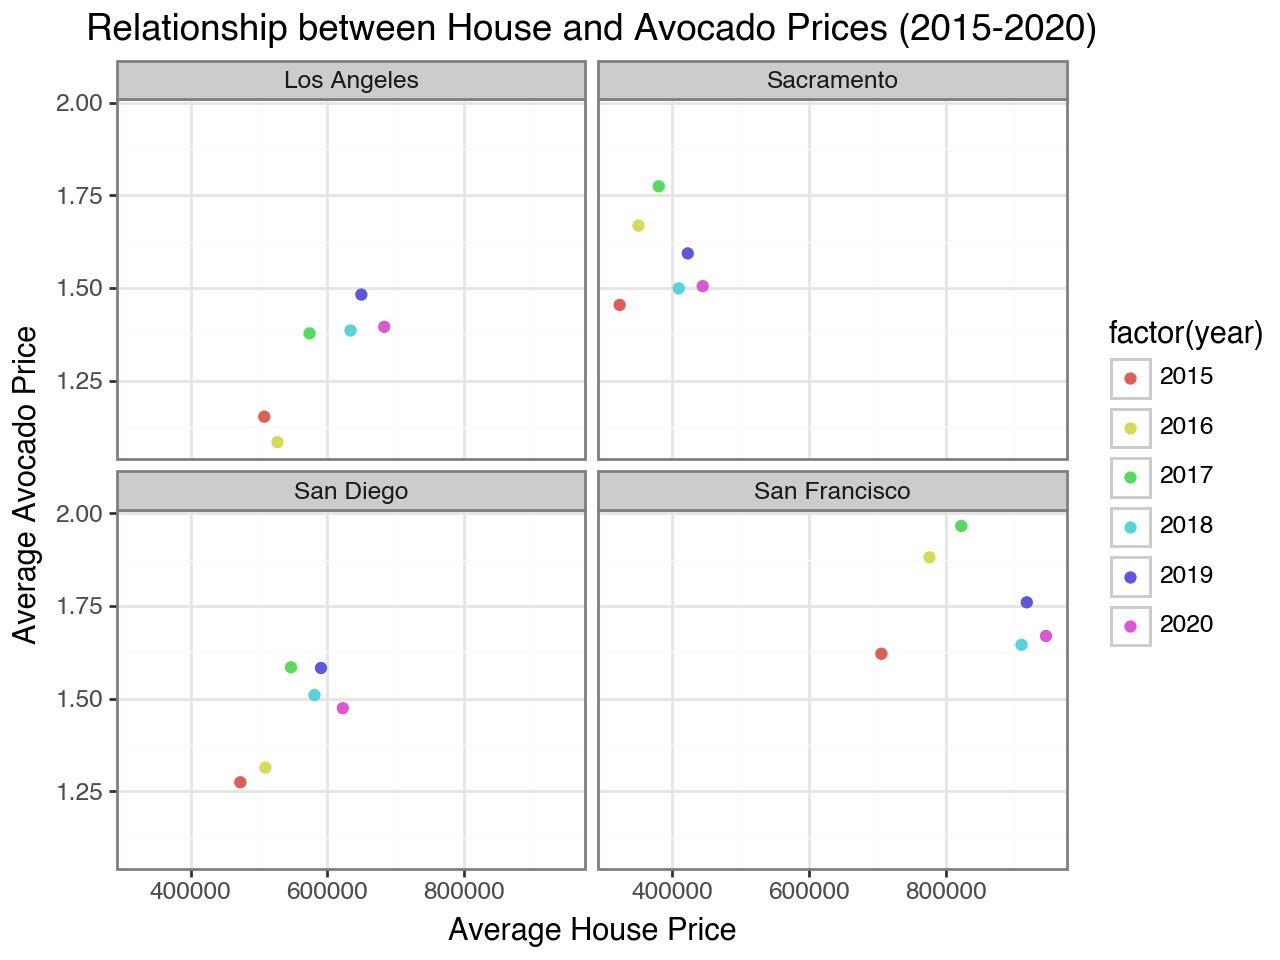

In [42]:
# Extract the house price data for the major california cities
house_prices_subset = house_prices_pivot[house_prices_pivot['city'].isin(
    ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco'])]

# Melt the house prices dataset to long format
house_prices_long = house_prices_subset.melt(id_vars='city', var_name='year', value_name='average_house_price')

# Extract the avocado price data for the same cities and years
avocado_prices_subset = california_data[
    california_data['city'].isin(['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco'])
]


# Group by city and year to get the average avocado price
avocado_prices_grouped = avocado_prices_subset.groupby(
    ['city', 'year'])['average_price'].mean().reset_index()

# Rename columns to match with the house prices data
avocado_prices_grouped.columns = ['city', 'year', 'average_avocado_price']

# Convert the year column to match the format in the house prices dataset
# Ensure year is of numeric type to match house_prices_long['year']
avocado_prices_grouped['year'] = avocado_prices_grouped['year'].astype(int) 

# Merge the datasets on city and year
merged_data = pd.merge(house_prices_long, avocado_prices_grouped, on=['city', 'year'])

# Melt the merged dataset to long format for plotting
comparison_long = merged_data.melt(id_vars=['city', 'year'], var_name='price_type', value_name='price')

import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, facet_wrap, labs, theme_bw

(
    ggplot(merged_data, aes(x='average_house_price', y='average_avocado_price', color='factor(year)')) +
    geom_point() +
    facet_wrap('~city') +
    labs(title="Relationship between House and Avocado Prices (2015-2020)",
         x="Average House Price", y="Average Avocado Price") +
    theme_bw()
)

Sources:

https://ds-ml-with-python.github.io/Course-Textbook/04-pivoting_joining.html

https://www.slingacademy.com/article/pandas-how-to-merge-2-dataframes/

https://plotnine.org/reference/examples/geom_point-preview

Based on the scatter plot showing the relationship between average house prices and avocado prices across different California cities (Los Angeles, Sacramento, San Diego, and San Francisco) from 2015 to 2020, I observed the following:

### Argument:
There appears to be no clear, direct correlation between house prices and avocado prices. Across all cities, the range of house prices varies significantly (especially in San Francisco), while the average avocado prices remain relatively stable. The following insights support this claim:

1. **Stable Avocado Prices with Minor Regional Differences**: While avocado prices remain relatively stable across all four cities, with prices generally fluctuating between $1.25 and $2.00, there are minor differences in average prices across regions. For instance, San Francisco’s avocado prices appear to be slightly higher on average compared to other cities, typically ranging from $1.50 to $2.00. In contrast, cities like Los Angeles, Sacramento, and San Diego see avocado prices more frequently in the $1.25 to $1.75 range. This slight increase in San Francisco may reflect the higher cost of living but does not suggest a dramatic divergence in pricing.

2. **House Price Variation**: The house prices in San Francisco are much higher compared to other cities, reaching around $800,000 to $900,000. Sacramento and San Diego have much lower house prices, yet their avocado prices remain similar to those in San Francisco. This lack of a corresponding increase in avocado prices despite higher house prices suggests that house price inflation does not necessarily lead to a significant rise in avocado prices.

3. **Yearly Variation**: Yearly fluctuations in avocado prices, as indicated by the colored points, do not show any clear pattern of correlation with house price trends. For example, in both San Francisco and San Diego, avocado prices cluster between $1.25 and $2.00, despite the wide variation in house prices between the two cities. This indicates that factors other than house prices, such as local agricultural supply and demand, likely play a larger role in influencing avocado prices.

### Conclusion:
While San Francisco shows slightly higher average avocado prices compared to cities like Los Angeles or Sacramento, this difference is modest and does not reflect the significant variation in house prices across the cities. Overall, avocado prices remain relatively stable across regions, with only minor differences that might reflect local cost-of-living factors. This suggests that avocado pricing is driven more by agricultural conditions, demand elasticity, transportation costs, or market conditions than by the housing market. The weak correlation between house prices and avocado prices indicates that these two factors operate largely independently of each other. 